In [24]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 시각화 셋팅
plt.rcParams['figure.figsize'] = [10,8] # 크기가 10과 8이라는 것
sns.set(style='whitegrid') # ㄱ자가 있는 형태
sns.set_palette('pastel') # 시각화도 예쁘게 보여주는것
warnings.filterwarnings('ignore')

In [9]:
# % 한글이 깨지는 경우 방지하기
# 이것을 잘 저장해뒀다가, 시각화 할 경우 한글이 깨진다면 이 코드를 입력하여 시각화하하면 된다.
from matplotlib import font_manager, rc
import matplotlib
import platform

if platform.system() == 'Windows':
    # 윈도우인 경우
    font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font',family=font_name)
else:
    # Mac인 경우
    rc('font',family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
# Loading 'Tips' dataset from seaborn
# seabron이 기본적인 시각화 라이브러리이다.
# 이 시각화 라이브러리들은 연습해볼 수 있도록 안에 Tips 예제를 넣어둔 경우가 있다.
# 그것을 가져와서 예제해본다.
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
# 데이터를 로딩해오면 반드시 데이터의 크기를 확인해봐야한다. ★★★★★
tips.shape
# 244개의 row가 있고, 7개의 변수가 있다는 것.

(244, 7)

In [6]:
# matplotlib 을 활용한 시각화
# 시각화를 바로 하는 경우도 있고, 파생 함수를 만들어서 유의미한 변수를 만들어 시각화를 보는 경우가 있다.
# 요일별로 그 사람이 Tip을 얼마나 받는지 알아본다.
sum_tip_by_day = tips.groupby('day')['tip'].sum()
sum_tip_by_day

day
Thur    171.83
Fri      51.96
Sat     260.40
Sun     247.39
Name: tip, dtype: float64

In [7]:
x_label = ['Thu','Fri','Sat','Sun']
x_label_index = np.arange(len(x_label))
x_label_index

array([0, 1, 2, 3])

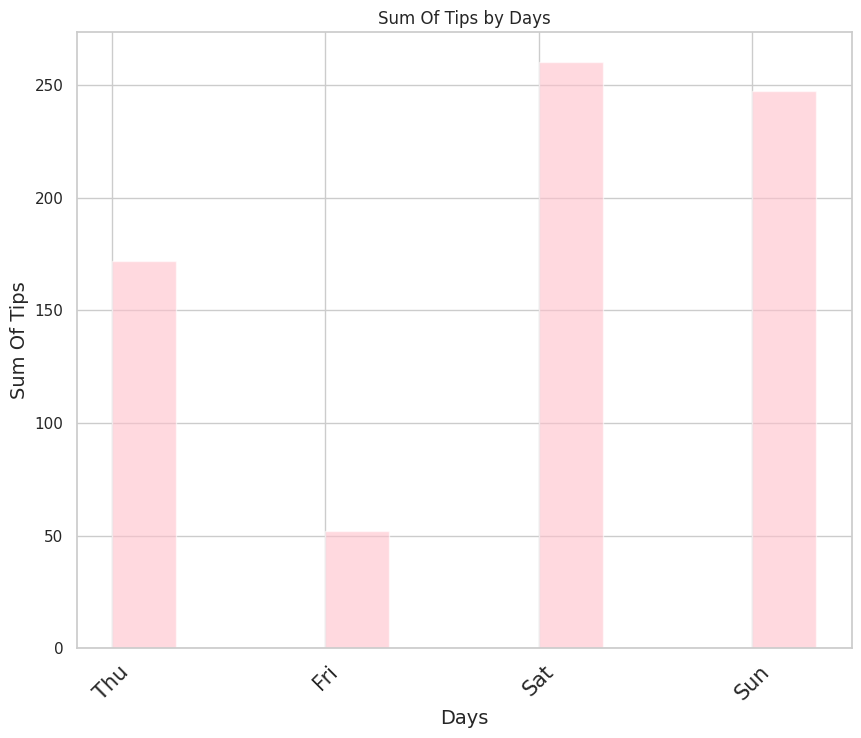

In [21]:
# Bar 차트 이해 및 제작 ★★★★★
plt.bar(x_label,sum_tip_by_day,
        color='pink', # 색 지정
        alpha=0.6, # 색 투명도
        width=0.3, # 너비
        align='edge') # 배치
# plt.show()를 안해주면 안보여도되는 글들을 자꾸 보여준다. 그것을 없애줌.
plt.title('Sum Of Tips by Days') # 제목
plt.xlabel('Days',fontsize=14)
plt.ylabel('Sum Of Tips',fontsize=14)
plt.xticks(x_label_index,
           x_label,
           rotation=45,
           fontsize=15)
plt.show()

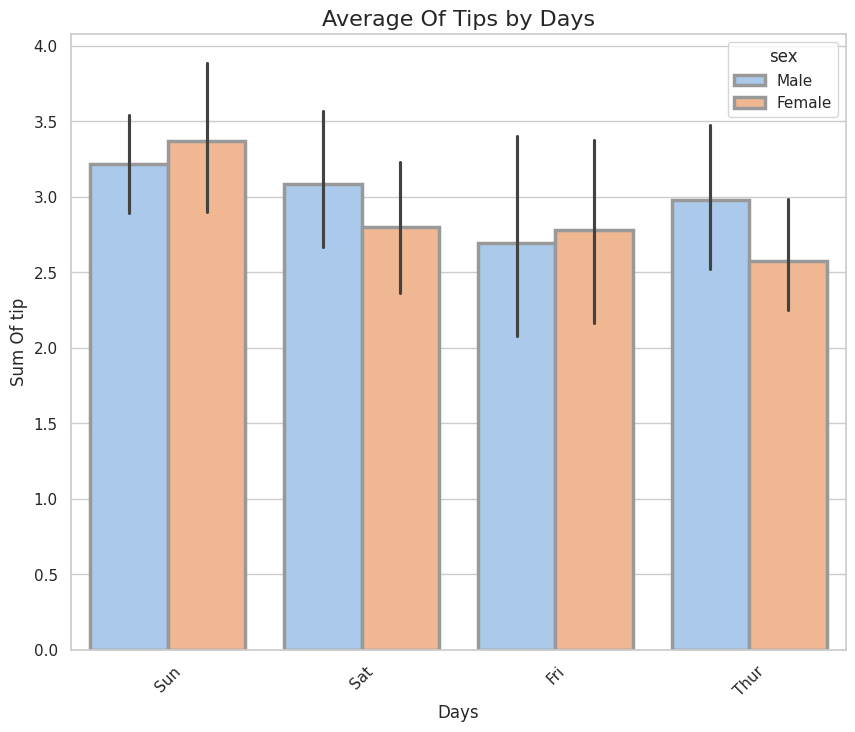

In [37]:
# seaborn을 활용한 시각화
sns.barplot(data=tips, # 데이터 프레임
            x='day', # x 변수
            y='tip', # y 변
            estimator=np.average, # sum은 "합값" | median은 "중간값" | average는 "평균값"
            hue='sex', # 색깔 구분으로 특정 컬럼값을 비교하고 싶을 때
            order=['Sun','Sat','Fri','Thur'], # x ticks 순서
            edgecolor='.6', # 바 모서리 선명도
            linewidth=2.5) # 모서리 두께
plt.title('Average Of Tips by Days',fontsize=16)
plt.xlabel('Days')
plt.ylabel('Sum Of tip')
plt.xticks(rotation=45)
plt.show()

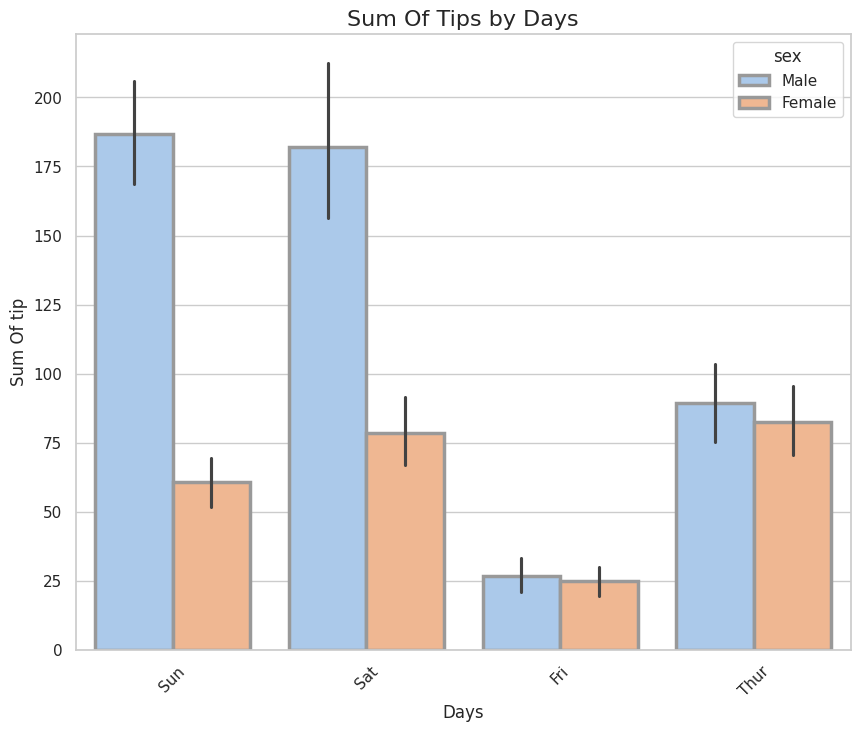

In [39]:
# seaborn을 활용한 시각화
sns.barplot(data=tips, # 데이터 프레임
            x='day', # x 변수
            y='tip', # y 변
            estimator=np.sum,
            hue='sex', # 색깔 구분으로 특정 컬럼값을 비교하고 싶을 때
            order=['Sun','Sat','Fri','Thur'], # x ticks 순서
            edgecolor='.6', # 바 모서리 선명도
            linewidth=2.5) # 모서리 두께
plt.title('Sum Of Tips by Days',fontsize=16)
plt.xlabel('Days')
plt.ylabel('Sum Of tip')
plt.xticks(rotation=45)
plt.show()

In [42]:
# Pie 차트 이해 및 제작 ★★★★★
# matplotlib을 활용한 시각화
sum_tip_by_day = tips.groupby('day')['tip'].sum()
ratio_tip_by_day = sum_tip_by_day/sum_tip_by_day.sum()

day
Thur    0.234875
Fri     0.071024
Sat     0.355942
Sun     0.338159
Name: tip, dtype: float64

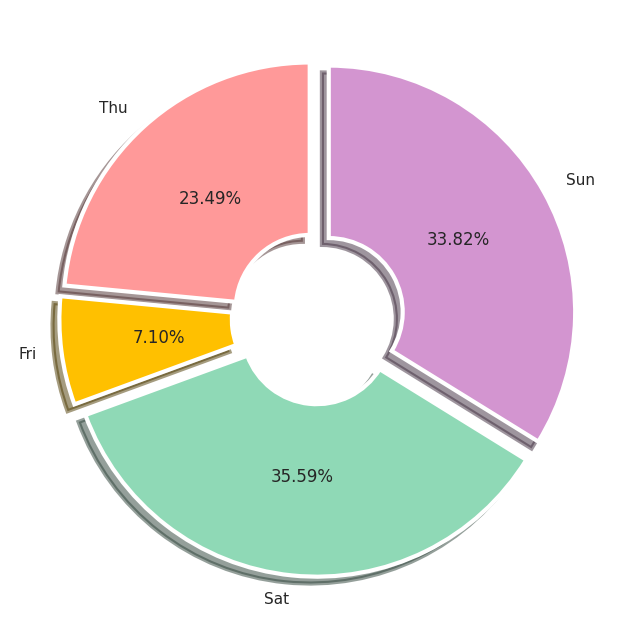

In [56]:
x_label = ['Thu','Fri','Sat','Sun']

plt.pie(ratio_tip_by_day, # 비율값
        labels=x_label, # 라벨값
        autopct='%.2f%%', # 부채꼴 안에 표시될 숫자 형식(소수 2자리까지 표시)
        startangle=90, # 축이 시작되는 각도 설정
        counterclock=True, # True: 시계방향순, False : 반시계방향
        explode=[0.05,0.05,0.05,0.05], # 중심에서 벗어나는 정도 표시
        shadow=True, # 그림자 표시 여부
        colors=['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'], # 색깔
        wedgeprops={'width':0.7,'edgecolor':'w','linewidth':3}) # 도넛 차트를 그릴 때 사용하는 옵션
plt.show()

In [57]:
# Line 차트 이해 및 제작 ★★★★★

# matplotlib을 활용해서 시각화

# line 차트 예제를 위해, tips 데이터에 가상 시간 컬럼 추가하기
# 일요일 데이터만 사용
sun_tips = tips[tips['day']=='Sun']
sun_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
186,20.90,3.50,Female,Yes,Sun,Dinner,3
187,30.46,2.00,Male,Yes,Sun,Dinner,5
188,18.15,3.50,Female,Yes,Sun,Dinner,3
189,23.10,4.00,Male,Yes,Sun,Dinner,3


In [62]:
# 현재 서버 시간을 얻기 위해 datatime 라이브러리 사용

import datetime
# datetime.date.today()
date = []
today = datetime.date.today()
date.append(today)

for time in range(sun_tips.shape[0]-1):
    today += datetime.timedelta(1) # 하루씩 추가
    date.append(today)
date

[datetime.date(2024, 4, 4),
 datetime.date(2024, 4, 5),
 datetime.date(2024, 4, 6),
 datetime.date(2024, 4, 7),
 datetime.date(2024, 4, 8),
 datetime.date(2024, 4, 9),
 datetime.date(2024, 4, 10),
 datetime.date(2024, 4, 11),
 datetime.date(2024, 4, 12),
 datetime.date(2024, 4, 13),
 datetime.date(2024, 4, 14),
 datetime.date(2024, 4, 15),
 datetime.date(2024, 4, 16),
 datetime.date(2024, 4, 17),
 datetime.date(2024, 4, 18),
 datetime.date(2024, 4, 19),
 datetime.date(2024, 4, 20),
 datetime.date(2024, 4, 21),
 datetime.date(2024, 4, 22),
 datetime.date(2024, 4, 23),
 datetime.date(2024, 4, 24),
 datetime.date(2024, 4, 25),
 datetime.date(2024, 4, 26),
 datetime.date(2024, 4, 27),
 datetime.date(2024, 4, 28),
 datetime.date(2024, 4, 29),
 datetime.date(2024, 4, 30),
 datetime.date(2024, 5, 1),
 datetime.date(2024, 5, 2),
 datetime.date(2024, 5, 3),
 datetime.date(2024, 5, 4),
 datetime.date(2024, 5, 5),
 datetime.date(2024, 5, 6),
 datetime.date(2024, 5, 7),
 datetime.date(2024, 5, 8),

In [63]:
sun_tips['date'] = date
sun_tips

,total_bill,tip,sex,smoker,day,time,size,date
0,16.99,1.01,Female,No,Sun,Dinner,2,2024-04-04
1,10.34,1.66,Male,No,Sun,Dinner,3,2024-04-05
2,21.01,3.50,Male,No,Sun,Dinner,3,2024-04-06
3,23.68,3.31,Male,No,Sun,Dinner,2,2024-04-07
4,24.59,3.61,Female,No,Sun,Dinner,4,2024-04-08
...,...,...,...,...,...,...,...,...
186,20.90,3.50,Female,Yes,Sun,Dinner,3,2024-06-14
187,30.46,2.00,Male,Yes,Sun,Dinner,5,2024-06-15
188,18.15,3.50,Female,Yes,Sun,Dinner,3,2024-06-16
189,23.10,4.00,Male,Yes,Sun,Dinner,3,2024-06-17


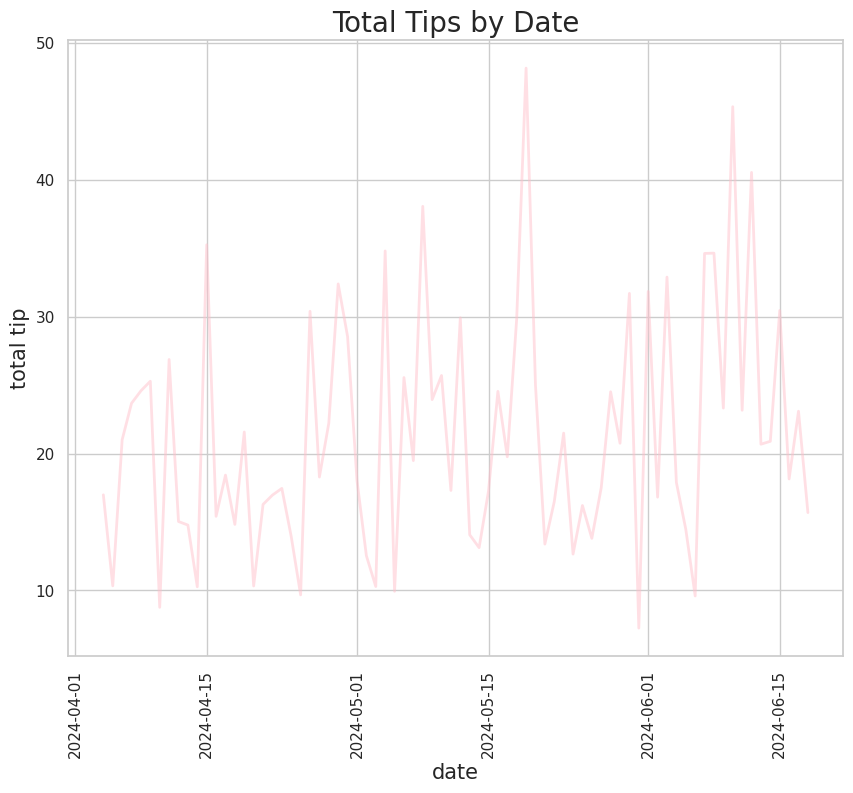

In [76]:
# line chart

plt.plot(sun_tips['date'],sun_tips['total_bill'],
         linestyle='-', # 라인 모양
         linewidth=2, # 라인 두께
         color='pink', # 색상 선택
         alpha=0.5
         ) # 투명도
plt.title('Total Tips by Date',fontsize=20)
plt.xlabel('date',fontsize=15)
plt.ylabel('total tip',fontsize=15)
plt.xticks(rotation=90)
plt.show()

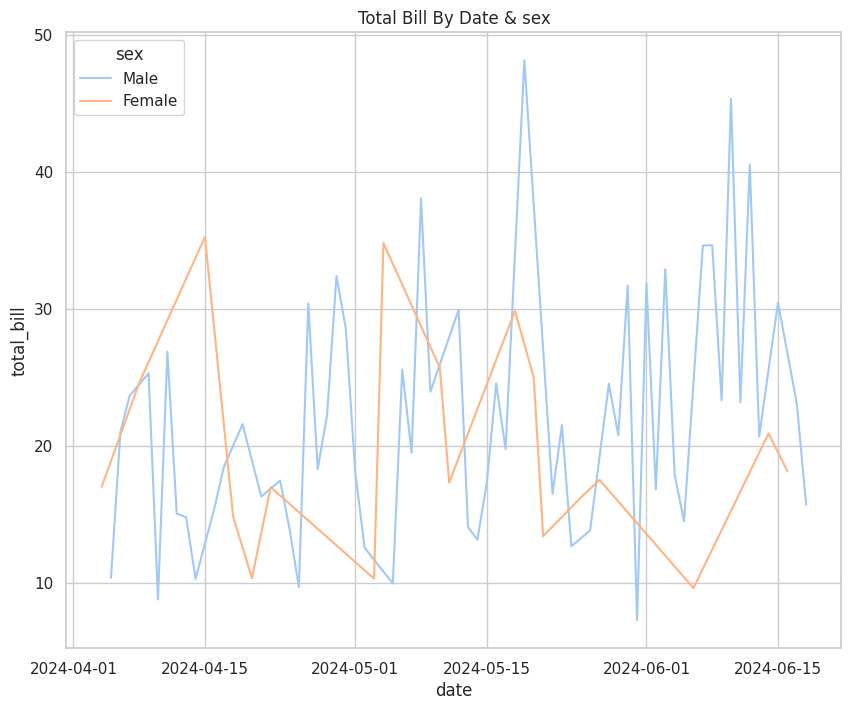

In [80]:
# seaborn을 활용한 시각화
sns.lineplot(data=sun_tips,
             x='date',
             y='total_bill',
             hue='sex')
plt.title('Total Bill By Date & sex')
plt.show()